<a href="https://colab.research.google.com/github/wambui-nduta/nduts/blob/main/Microsoft_malware_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Business Understanding***

# ***1: Load and Explore the Dataset***

## ***A. Display general information about the dataset***

In [47]:
pip install ydata_profiling

In [48]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy import stats


In [49]:
# Step 2: Loading and exploring the dataset
df = pd.read_csv('/content/Microsoft_malware_dataset_min.csv')

In [50]:
# Step 3: Displaying general information about the dataset
df.head()


,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [52]:
# Step 4: Describe the data
df.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


## ***Create a pandas profiling reports to gain insights into the dataset***
Let's generate the pandas profiling report for more insights.

In [53]:
# Step 5: Generate a pandas profiling report
from ydata_profiling import ProfileReport
# Generate a profiling report
profile_report = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile_report.to_notebook_iframe()

# Generate the profiling report
profile_report.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
# Step 6: Check for missing values

df.isnull().sum() # Counts the number of missing values in each column

,0
HasDetections,0
Wdft_IsGamer,3415
Census_IsVirtualDevice,185
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,1076
SMode,5932
IsProtected,391
OsPlatformSubRelease,0
CountryIdentifier,0


In [55]:
 #fill in missing values
 #Fill numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [56]:
df.isnull().sum()

,0
HasDetections,0
Wdft_IsGamer,0
Census_IsVirtualDevice,0
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,0
SMode,0
IsProtected,0
OsPlatformSubRelease,0
CountryIdentifier,0


In [57]:
# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
   df[col] = df[col].fillna(df[col].mode()[0])

In [58]:
df.isnull().sum()

,0
HasDetections,0
Wdft_IsGamer,0
Census_IsVirtualDevice,0
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,0
SMode,0
IsProtected,0
OsPlatformSubRelease,0
CountryIdentifier,0


In [59]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16114 entries, 0 to 99962
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HasDetections               16114 non-null  int64  
 1   Wdft_IsGamer                16114 non-null  float64
 2   Census_IsVirtualDevice      16114 non-null  float64
 3   Census_OSEdition            16114 non-null  object 
 4   Census_HasOpticalDiskDrive  16114 non-null  int64  
 5   Firewall                    16114 non-null  float64
 6   SMode                       16114 non-null  float64
 7   IsProtected                 16114 non-null  float64
 8   OsPlatformSubRelease        16114 non-null  object 
 9   CountryIdentifier           16114 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 1.4+ MB


In [61]:
 # Handle outliers using Z-score
 z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
 abs_z_scores = np.abs(z_scores)
 filtered_entries = (abs_z_scores < 3).all(axis=1)
 df = df[filtered_entries]
 df.reset_index(drop=True, inplace=True)
print("\nShape after removing outliers:", df.shape)



Shape after removing outliers: (14195, 10)


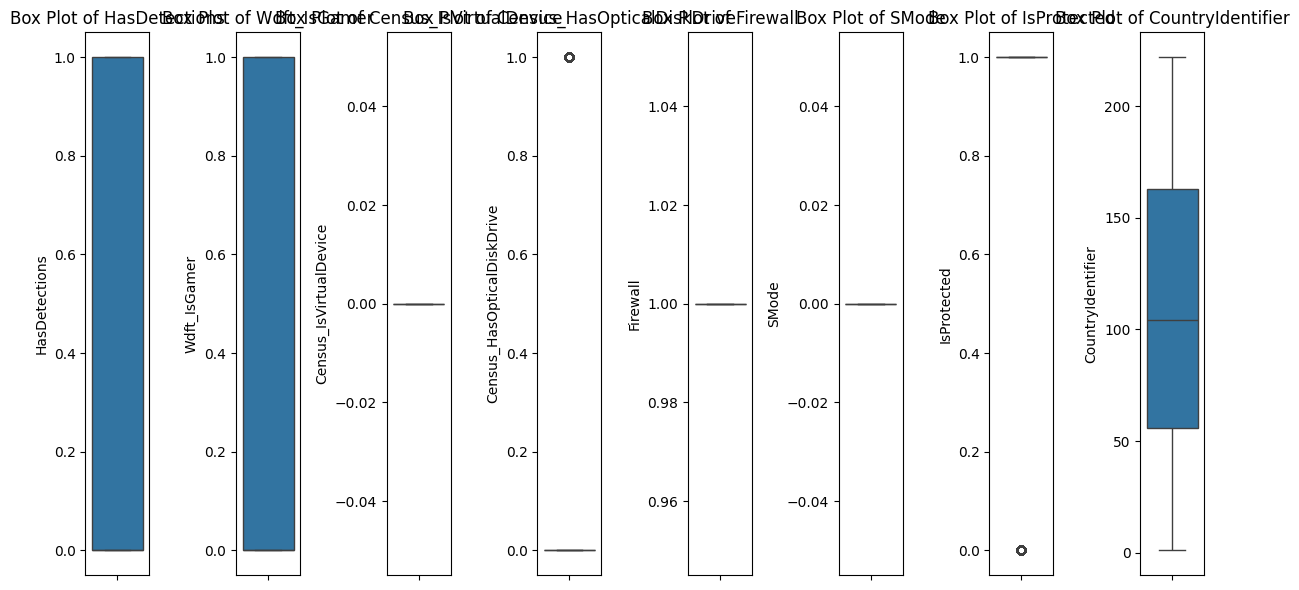

In [62]:
#Plot boxplot after outlier removal
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('box_plots_after_outlier_removal.png')
plt.show()


In [68]:
 # Encode categorical features
 from sklearn.preprocessing import LabelEncoder
 label_encoder = LabelEncoder()
 categorical_cols = df.select_dtypes(include=['object']).columns

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
 df_copy = df.copy()

 for col in categorical_cols:
   df_copy[col] = label_encoder.fit_transform(df_copy[col])

 df = df_copy # Update df to the modified copy

In [69]:
# Step 9: Removing duplicates

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_copy = df.copy()

df_copy.drop_duplicates(inplace=True)

df = df_copy # Update df to the modified copy

# ***2. Building a model***




In [70]:
#import model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Supervised Learning - Decision Tree
def train_decision_tree(df):
    X = df.drop('HasDetections', axis=1)
    y = df['HasDetections']
    return X, y # Return X and y from the function

# Call the function to populate X and y
X, y = train_decision_tree(df)

In [72]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
 # Initial Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Decision Tree Accuracy: {accuracy * 100:.2f}%")



Initial Decision Tree Accuracy: 25.71%


In [75]:
# Unsupervised Learning - KMeans Clustering
def perform_clustering(X):
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Elbow method to find optimal K
    inertias = []
    K = range(1, 11)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

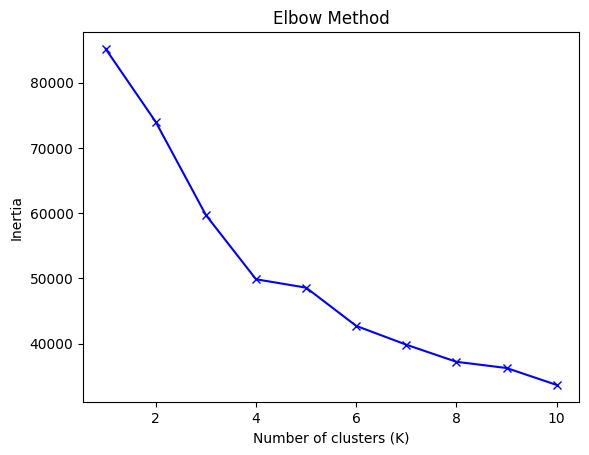

In [81]:
#define  X_scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#define k
K = range(1, 11)
#define inertia
inertias = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)



#plot elbow curve
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


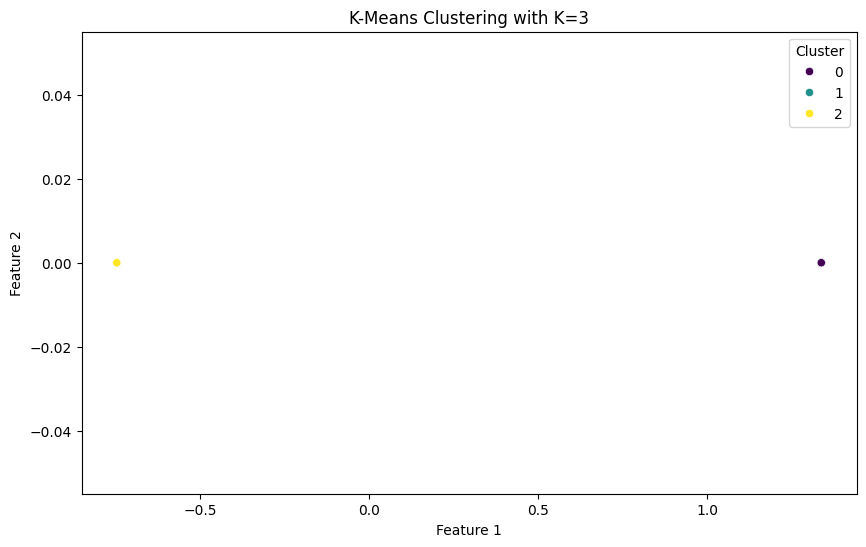

In [85]:
#optimal k parameter
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


#plot optomal k
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis')
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
# Step 13: Imputing missing values in numerical features before splitting and scaling
from sklearn.impute import SimpleImputer

# Identify numerical columns that may still contain NaNs after previous steps
numerical_cols_with_potential_na = ['Model Year', 'Base MSRP']

# Impute missing values with the median for these columns
imputer = SimpleImputer(strategy='median')

# Fit on the entire DataFrame before splitting to avoid data leakage
df[numerical_cols_with_potential_na] = imputer.fit_transform(df[numerical_cols_with_potential_na])

# Verify that there are no more NaNs in the selected features
print(df[df.columns].isnull().sum())

In [ ]:
# Step 14: Selecting target variable and features
X = df[['Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP']]
y = df['Expected Price ($1k)']

In [ ]:
# Step 15: Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 16: Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 17: Building and training SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

In [ ]:
# Step 18: Assessing model performance
y_pred = svm_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

# ***3. Discussion on model improvement***

To improve the SVM model performance, consider:

1. Hyperparameter tuning using GridSearchCV for optimal kernel, C, and gamma values
2. Trying different kernel functions (linear, polynomial)
3. Feature engineering to create new relevant features
4. Using ensemble methods to combine SVM with other algorithms
5. Collecting more data to improve model generalization


# ***4. Tuning and improving the Model***

In [ ]:
# Step 1: Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import uuid

In [ ]:
# Step 1: Feature engineering
df['Age'] = 2025 - df['Model Year']  # Adding vehicle age
df['Price_Range_Ratio'] = df['Expected Price ($1k)'] / (df['Electric Range'] + 1)  # Avoiding division by zero

Feature Engineering:

I added Age and Price_Range_Ratio to directly addresses key factors in vehicle pricing (depreciation and efficiency), improving model relevance.

Why I considerd these Features:

- Depreciation (Age of car): In the used car market, age is a key driver of the price of a vehicle. By adding Age, we make it easier for the model to account for this universal factor.
- Efficiency (Price_Range_Ratio): Electric vehicle buyers prioritize range relative to cost. Price_Range_Ratio directly measures this, aligning the model with real-world buyer behavior.

These features simplify complex relationships in the data, making it easier for the SVM to learn patterns that drive prices, leading to more accurate predictions.

In short, Age and Price_Range_Ratio give the model a better understanding of how cars are valued in the real world, like how buyers think when choosing between a newer, pricier car or a cheaper one with great range.

In [ ]:
# Step 2: Selecting target variable and features
X = df[['Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP', 'Age', 'Price_Range_Ratio']]
y = df['Expected Price ($1k)']

In [ ]:
# Step 3: Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 5: Building and training optimized SVM model with hyperparameter tuning
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1]
}
svm_model = SVR()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_svm = grid_search.best_estimator_

Hyperparameter Tuning:
 GridSearchCV was the viable choice i used to improve my model because it ensures the SVM is finely tuned, maximizing its predictive power for this dataset’s structure.

In [ ]:
# Step 6: Building ensemble model with RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

Ensemble Method:
- An ensemble method combines predictions from multiple machine learning models to improve accuracy and robustness
- So in this case combining SVM with RandomForest leverages complementary strengths, reducing errors from SVM’s sensitivity to outliers and RandomForest’s tendency to overfit.

In [ ]:
# Step 7: Combining SVM and RandomForest predictions
svm_pred = best_svm.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
ensemble_pred = (svm_pred + rf_pred) / 2

In [ ]:
# Step 8: Assessing model performance
mse_svm = mean_squared_error(y_test, svm_pred)
r2_svm = r2_score(y_test, svm_pred)
mse_ensemble = mean_squared_error(y_test, ensemble_pred)
r2_ensemble = r2_score(y_test, ensemble_pred)

print(f'SVM Mean Squared Error: {mse_svm:.2f}')
print(f'SVM R2 Score: {r2_svm:.2f}')
print(f'Ensemble Mean Squared Error: {mse_ensemble:.2f}')
print(f'Ensemble R2 Score: {r2_ensemble:.2f}')
print(f'Best SVM Parameters: {grid_search.best_params_}')